# Proyecto Censo INEGI 20203

## Librerías y datos

In [1]:
import requests
import json
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cufflinks as cf
!pip install chart_studio
import chart_studio.plotly as py
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()


     |████████████████████████████████| 71kB 3.5MB/s 


In [2]:
%cd /content/
!git clone https://github.com/aarondiuz/Proyecto_Censo.git
%cd Proyecto_Censo

/content
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  git-lfs
0 upgraded, 1 newly installed, 0 to remove and 17 not upgraded.
Need to get 2,129 kB of archives.
After this operation, 7,662 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 git-lfs amd64 2.3.4-1 [2,129 kB]
Fetched 2,129 kB in 1s (2,526 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package git-lfs.
(Reading database ... 146425 files and dire

## Crecimiento poblacional en México

In [3]:
# Llamado al API
url='https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/1002000001/es/00000/false/BISE/2.0/4f7019f8-60f7-2212-a6ed-db6ca9251086?type=json'
response= requests.get(url)
if response.status_code==200:
    content= json.loads(response.content)
    Series=content['Series'][0]['OBSERVATIONS'] 
    
    #print(Series)
    
    #Obtención de la lista de observaciones 
    Lista_PoblacionTotal = []
    Lista_Periodo = []
    for obs in Series: 
        Lista_PoblacionTotal.append(float(obs['OBS_VALUE']))
        Lista_Periodo.append(int(obs['TIME_PERIOD']))
            
    #Generación del promedio de la lista de observaciones
    for i in range(0,len(Lista_PoblacionTotal)):
        print(str(Lista_Periodo[i])+":",Lista_PoblacionTotal[i])

1910: 15160369.0
1921: 14334780.0
1930: 16552722.0
1940: 19653552.0
1950: 25791017.0
1960: 34923129.0
1970: 48225238.0
1980: 66846833.0
1990: 81249645.0
1995: 91158290.0
2000: 97483412.0
2005: 103263388.0
2010: 112336538.0
2015: 119938473.0
2020: 126014024.0


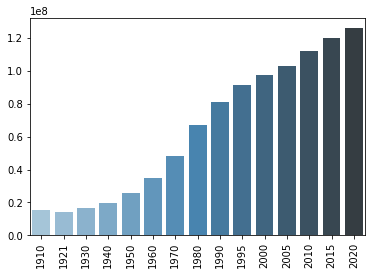

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#sns.set_theme(style="whitegrid")
sns.barplot(x=Lista_Periodo, y=Lista_PoblacionTotal,palette="Blues_d")
plt.xticks(rotation=90)
plt.show()

### Crecimiento poblacional por sexo

Indicadores
* Población total de hombres: 1002000002
* Población total de mujeres: 1002000003

In [5]:
# We can address more than one indicator using comma
url='https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/1002000002,1002000003/es/0700/false/BISE/2.0/d4536fae-59fd-94aa-e9a8-d743e7b47fcd?type=json'
response= requests.get(url)
if response.status_code==200:
    content= json.loads(response.content)
    
    # Obtención de series
    Series_Hombres=content['Series'][0]['OBSERVATIONS']
    Series_Mujeres=content['Series'][1]['OBSERVATIONS']
    
    # Obtención de la lista de población 
    Lista_PoblacionHombres = []
    Lista_PoblacionMujeres = []
    for obs in Series_Hombres: 
        Lista_PoblacionHombres.append(float(obs['OBS_VALUE']))
    for obs in Series_Mujeres:
        Lista_PoblacionMujeres.append(float(obs['OBS_VALUE']))
    
    # La base de datos de la API llega solamente al 2010, por lo que se agregan dos valores extras para cada sexo
    Lista_PoblacionHombres.append(58056133.0) #2015
    Lista_PoblacionHombres.append(61473390.0) #2020
    Lista_PoblacionMujeres.append(61474620.0) #2015
    Lista_PoblacionMujeres.append(64540634.0) #2020
        
    print(Lista_PoblacionHombres)
    print('------------------')
    print(Lista_PoblacionMujeres)

[7504471.0, 7003785.0, 8119004.0, 9695787.0, 12696935.0, 17415320.0, 24065614.0, 33039307.0, 39893969.0, 44900499.0, 47592253.0, 50249955.0, 54855231.0, 58056133.0, 61473390.0]
------------------
[7655898.0, 7330995.0, 8433718.0, 9957765.0, 13094082.0, 17507809.0, 24159624.0, 33807526.0, 41355676.0, 46257791.0, 49891159.0, 53013433.0, 57481307.0, 61474620.0, 64540634.0]


In [6]:
# DataFrame creation
import pandas as pd

poblacionDict = {'Year': Lista_Periodo, 'Both': Lista_PoblacionTotal,'Men': Lista_PoblacionHombres,'Women': Lista_PoblacionMujeres}
PoblacionDF = pd.DataFrame(poblacionDict)
PoblacionDF

,Year,Both,Men,Women
0,1910,15160369.0,7504471.0,7655898.0
1,1921,14334780.0,7003785.0,7330995.0
2,1930,16552722.0,8119004.0,8433718.0
3,1940,19653552.0,9695787.0,9957765.0
4,1950,25791017.0,12696935.0,13094082.0
5,1960,34923129.0,17415320.0,17507809.0
6,1970,48225238.0,24065614.0,24159624.0
7,1980,66846833.0,33039307.0,33807526.0
8,1990,81249645.0,39893969.0,41355676.0
9,1995,91158290.0,44900499.0,46257791.0


In [7]:
# Se reordena el DF
df = pd.melt(PoblacionDF, id_vars="Year", var_name="Sex", value_name="Population")
df.head()

,Year,Sex,Population
0,1910,Both,15160369.0
1,1921,Both,14334780.0
2,1930,Both,16552722.0
3,1940,Both,19653552.0
4,1950,Both,25791017.0


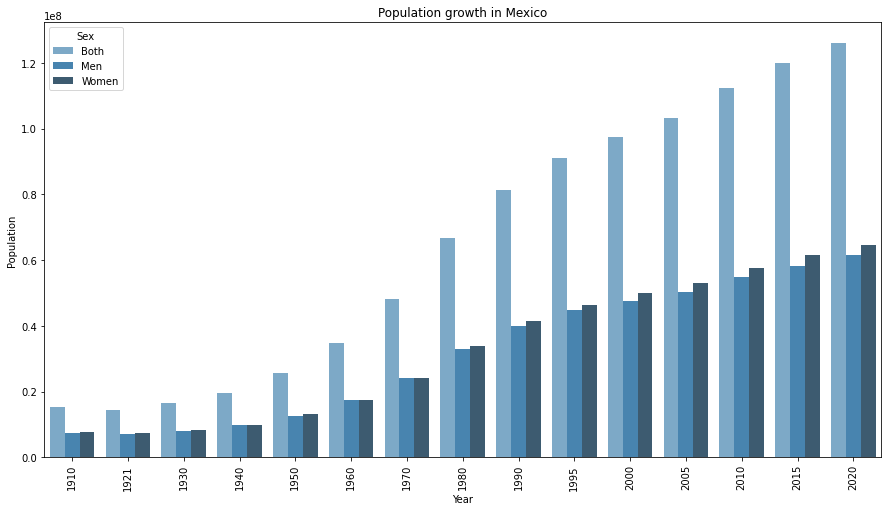

In [8]:
plt.figure(figsize=(15,8))
plt.title('Population growth in Mexico')
sns.barplot(x='Year', y='Population', data=df, hue='Sex', palette="Blues_d")
plt.xticks(rotation=90)
plt.show()

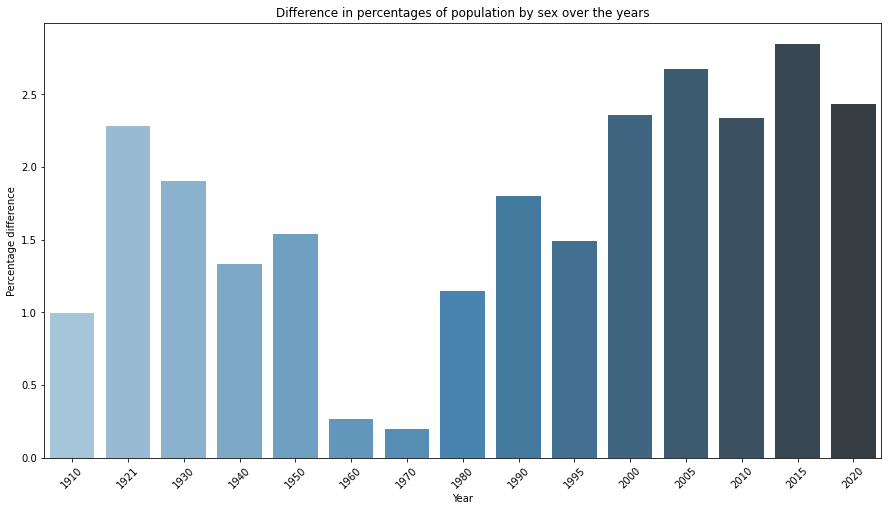

In [9]:
# Positive values means predominance of women, negative values means predominance of men
PoblacionDF['DiffP'] = 100*(PoblacionDF['Women']-PoblacionDF['Men'])/PoblacionDF['Both']

plt.figure(figsize=(15,8))
plt.title('Difference in percentages of population by sex over the years')
sns.barplot(x=PoblacionDF['Year'], y=PoblacionDF['DiffP'] ,palette="Blues_d")
plt.ylabel('Percentage difference')
plt.xticks(rotation=45)
plt.show()

## Percentage of population aged 12 years and older economically active by state

In [10]:
# DataFrame of states with ID Number
# Se agregarn las abreviaturas de acuerdo con cierto instituto (para cita)
nombres_estados = pd.read_csv('data/Catalogo_entidades.csv')
nombres_estados = nombres_estados[:32]
nombres_estados

,CLAVE_ENTIDAD,ENTIDAD_FEDERATIVA,ABREVIATURA
0,1,AGUASCALIENTES,AS
1,2,BAJA CALIFORNIA,BC
2,3,BAJA CALIFORNIA SUR,BS
3,4,CAMPECHE,CC
4,5,COAHUILA DE ZARAGOZA,CL
5,6,COLIMA,CM
6,7,CHIAPAS,CS
7,8,CHIHUAHUA,CH
8,9,CIUDAD DE MÉXICO,DF
9,10,DURANGO,DG


In [11]:
# We need to sweep over the '070000xx' in the URL API
# Checar el orden

ListPercent = []

for number in nombres_estados['CLAVE_ENTIDAD']:
    if number < 10:
        idnum = '0700000'+str(number)
    else:
        idnum = '070000'+str(number)
    url = 'https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/6207019030/es/'+idnum+'/true/BISE/2.0/d4536fae-59fd-94aa-e9a8-d743e7b47fcd?type=json'
    response = requests.get(url)
    if response.status_code == 200:
        content = json.loads(response.content)
        
        # Adding Series to ListPercent
        ListPercent.append(float("{:.4f}".format(float(content['Series'][0]['OBSERVATIONS'][0]['OBS_VALUE']))))

print(ListPercent)

[63.3042, 65.5097, 67.0458, 63.3418, 59.9867, 65.2662, 61.1885, 62.273, 64.43, 57.7831, 61.8386, 60.5907, 61.1115, 64.1029, 62.1736, 62.0611, 63.5905, 62.7958, 61.4212, 56.7805, 61.9887, 65.0311, 68.4718, 60.6239, 60.6219, 60.9995, 62.3378, 61.3346, 61.0184, 59.1622, 61.7407, 56.0278]


In [12]:
# Lets add ListPercent to the DataFrame
nombres_estados['PERCENTAGE'] = ListPercent
nombres_estados

,CLAVE_ENTIDAD,ENTIDAD_FEDERATIVA,ABREVIATURA,PERCENTAGE
0,1,AGUASCALIENTES,AS,63.3042
1,2,BAJA CALIFORNIA,BC,65.5097
2,3,BAJA CALIFORNIA SUR,BS,67.0458
3,4,CAMPECHE,CC,63.3418
4,5,COAHUILA DE ZARAGOZA,CL,59.9867
5,6,COLIMA,CM,65.2662
6,7,CHIAPAS,CS,61.1885
7,8,CHIHUAHUA,CH,62.2730
8,9,CIUDAD DE MÉXICO,DF,64.4300
9,10,DURANGO,DG,57.7831


In [13]:
# We need to import an XML file with geographic information of all states
estados_geo = ('data/mexico_estados_geo.json')

We will be using the library _Folium_ so we can make pretty interactive maps.

In [14]:
import folium
import branca.colormap as cm

mapa = folium.Map(location = [24,-102], zoom_start=5)

# Posteriormente se añade la información necesaria para modificar el mapa en función de los datos del dataframe
folium.Choropleth(geo_data = estados_geo, data = nombres_estados,
                 columns = ['ABREVIATURA', 'PERCENTAGE'], key_on = 'feature.id',
                 fill_color ='YlGnBu',
                 fill_opacity=0.9,
                 legend_name='Percentage').add_to(mapa)

# Se presenta el mapa
mapa

## Average level of schooling of the population 15 years of age and older 

As we want to know about the average level of schooling, historically and in the last census, the data from 2020 isn't available in the API, so we will request only the data from 2000 to 2015, and we will grab the 2020 data from the CSV provided in the next link:
https://www.inegi.org.mx/programas/ccpv/2020/#Datos_abiertos

In [15]:
# Lets get the data from 2000 to 2015
url='https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/1005000038/es/0700/false/BISE/2.0/d4536fae-59fd-94aa-e9a8-d743e7b47fcd?type=json'
response= requests.get(url)
if response.status_code==200:
    content= json.loads(response.content)
    
    Serie = content['Series'][0]['OBSERVATIONS']
    
    List_Periods=[]
    List_AvgGrade=[]
    for observation in Serie:
        if observation['TIME_PERIOD'] == '1995': # Since the OBS_VALUE is None
            pass
        else:
            List_Periods.append(int(observation['TIME_PERIOD']))
            List_AvgGrade.append(float("{:.3f}".format(float(observation['OBS_VALUE']))))
            
    print(List_Periods,'\n\n',List_AvgGrade)

[2000, 2005, 2010, 2015] 

 [7.5, 8.1, 8.63, 9.162]


In [16]:
!unzip 'data/conjunto_de_datos_iter_00_cpv2020.zip'
!mv conjunto_de_datos_iter_00_cpv2020.csv data/conjunto_de_datos_iter_00_cpv2020.csv
# Now we should call the CSV to get the 2020 data
data_2020 = pd.read_csv('data/conjunto_de_datos_iter_00_cpv2020.csv', low_memory=False)
data_2020.head()

Archive:  data/conjunto_de_datos_iter_00_cpv2020.zip
  inflating: conjunto_de_datos_iter_00_cpv2020.csv  


,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,P_0A2_M,P_3YMAS,P_3YMAS_F,P_3YMAS_M,P_5YMAS,P_5YMAS_F,P_5YMAS_M,P_12YMAS,P_12YMAS_F,P_12YMAS_M,P_15YMAS,P_15YMAS_F,P_15YMAS_M,P_18YMAS,P_18YMAS_F,P_18YMAS_M,P_3A5,P_3A5_F,P_3A5_M,P_6A11,P_6A11_F,P_6A11_M,P_8A14,P_8A14_F,P_8A14_M,P_12A14,...,VPH_2YMASD,VPH_1CUART,VPH_2CUART,VPH_3YMASC,VPH_C_ELEC,VPH_S_ELEC,VPH_AGUADV,VPH_AEASP,VPH_AGUAFV,VPH_TINACO,VPH_CISTER,VPH_EXCSA,VPH_LETR,VPH_DRENAJ,VPH_NODREN,VPH_C_SERV,VPH_NDEAED,VPH_DSADMA,VPH_NDACMM,VPH_SNBIEN,VPH_REFRI,VPH_LAVAD,VPH_HMICRO,VPH_AUTOM,VPH_MOTO,VPH_BICI,VPH_RADIO,VPH_TV,VPH_PC,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
0,0,Total nacional,0,Total nacional,0,Total nacional,NaN,NaN,NaN,126014024,64540634,61473390,5764054,2848875,2915179,119976584,61554567,58422017,115693273,59433559,56259714,100528155,51962264,48565891,93985354,48732991,45252363,87492680,45530857,41961823,6462212,3193548,3268664,12986217,6398755,6587462,15287375,7531118,7756257,6542801,...,23887498,2085925,5460133,27527131,34805976,268863,33858339,29541708,1215497,22629812,9652823,33081729,1396774,33564054,1498766,32671764,79584,32979844,16874580,581095,30811260,25610544,16651199,16340788,4227460,7469168,23772973,32031555,13204680,13184550,30775898,18307193,15211306,6616141,4047100,1788552,3170894,15108204,852871,*
1,0,Total nacional,0,Total nacional,9998,Localidades de una vivienda,NaN,NaN,NaN,250354,96869,153485,10493,5193,5300,239441,91463,147978,232086,87931,144155,207748,76111,131637,197411,71344,126067,186968,66514,120454,10900,5270,5630,20793,10082,10711,24342,11538,12804,10337,...,31851,7333,16206,38424,48426,13538,45470,8198,16498,34143,13743,44688,9825,47253,14708,35091,4842,43668,24373,5136,38199,26412,13608,30940,15001,13600,36738,40001,5797,3523,47005,8385,18981,1732,1113,12775,14143,51293,7154,*
2,0,Total nacional,0,Total nacional,9999,Localidades de dos viviendas,NaN,NaN,NaN,147125,61324,85801,6798,3407,3391,139757,57628,82129,135028,55256,79772,119223,47543,71680,111530,44275,67255,104612,41184,63428,7028,3511,3517,13506,6574,6932,16724,7679,9045,7693,...,19157,4351,9491,22351,28586,7607,26499,5054,9696,18089,7029,24348,6050,26036,10155,19807,2935,23841,16122,4115,21775,15880,7902,16699,8076,6330,20009,23198,3588,2177,25581,5027,11306,971,708,8247,10065,29741,5283,*
3,1,Aguascalientes,0,Total de la entidad Aguascalientes,0,Total de la Entidad,NaN,NaN,NaN,1425607,728924,696683,71864,35604,36260,1352235,692561,659674,1299669,666713,632956,1116719,576593,540126,1038904,538387,500517,960764,500089,460675,78833,38679,40154,156683,77289,79394,181905,89383,92522,77815,...,299141,6390,30686,348487,384361,1210,383430,355192,2137,295903,152521,382597,1011,383148,2379,380982,184,382121,130744,876,365189,335710,238571,240381,45642,105752,312002,370411,177149,147818,359895,236003,174089,98724,70126,6021,15323,128996,1711,*
4,1,Aguascalientes,0,Total de la entidad Aguascalientes,9998,Localidades de una vivienda,NaN,NaN,NaN,3697,1510,2187,165,81,84,3532,1429,2103,3420,1377,2043,3018,1179,1839,2836,1086,1750,2609,987,1622,169,80,89,345,170,175,427,211,216,182,...,531,39,116,646,723,78,694,195,107,608,405,708,27,719,82,610,16,704,203,12,632,561,276,529,216,407,650,684,167,43,732,205,212,48,41,39,62,530,20,*


From the provided dictionary in the link from above, we can search for the Mnemotecnic of the indicator. In this case, we will be using _GRAPROES_.

In [17]:
# We select some columns that will be useful for later on.
graproes_2020 = data_2020[['ENTIDAD','NOM_ENT','NOM_LOC','GRAPROES']]
graproes_2020

,ENTIDAD,NOM_ENT,NOM_LOC,GRAPROES
0,0,Total nacional,Total nacional,9.74
1,0,Total nacional,Localidades de una vivienda,6.5
2,0,Total nacional,Localidades de dos viviendas,6.45
3,1,Aguascalientes,Total de la Entidad,10.35
4,1,Aguascalientes,Localidades de una vivienda,8.14
...,...,...,...,...
195657,32,Zacatecas,Mesa Grande,6.51
195658,32,Zacatecas,San Isidro,*
195659,32,Zacatecas,San Miguel Tepetitlán,7.22
195660,32,Zacatecas,San Rafael,*


In [18]:
# Now, we can extract the national average grade of schooling from 2020
List_Periods.append(2020)
List_AvgGrade.append(float(graproes_2020['GRAPROES'][0]))

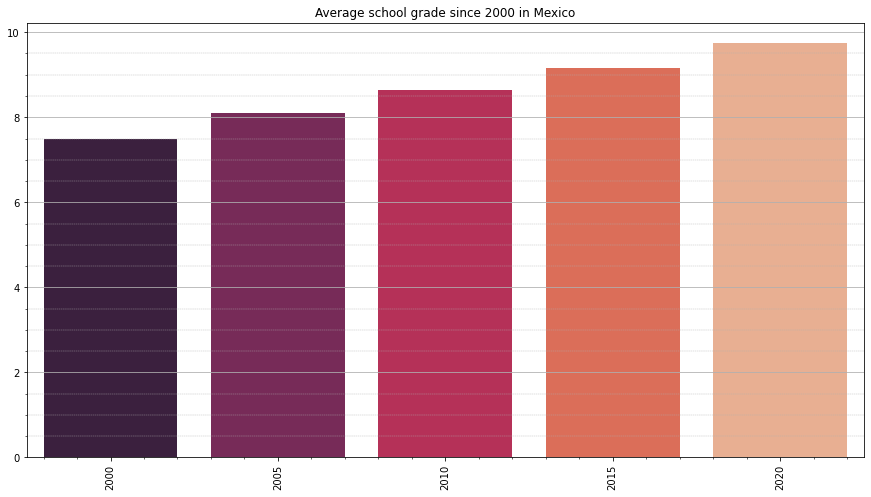

In [19]:
plt.figure(figsize=(15,8))
plt.title('Average school grade since 2000 in Mexico')
sns.barplot(x=List_Periods, y=List_AvgGrade, palette="rocket", orient='v')
plt.xticks(rotation=90)
plt.minorticks_on()
plt.grid(which='major', axis='y')
plt.grid(which='minor', axis='y', linestyle='--', linewidth=0.4)
plt.show()

It is possible to predict with a simple linear extrapolation, what will be the average school grade in 2025 and 2030.

In [61]:
from scipy.interpolate import UnivariateSpline

Extra_List_Periods = List_Periods.copy()
for i in [2025, 2030]:
  Extra_List_Periods.append(i)
'''x = List_Periods
y = List_AvgGrade
f = interp1d(x, y)'''
#f2 = interp1d(x, y, kind='cubic')

extrapolator = UnivariateSpline( List_Periods, List_AvgGrade, k=1 )

#fig, ax1 = plt.subplots(figsize=(12,6))
#sns.barplot(x=Extra_List_Periods, y=extrapolator(Extra_List_Periods), palette="rocket", orient='v', ax=ax1)

fig = go.Figure()
fig.add_trace(go.Bar(x=List_Periods, y=List_AvgGrade, name='Original Data'))
fig.add_trace(go.Bar(x=Extra_List_Periods[-2:], y=extrapolator(Extra_List_Periods)[-2:], marker_color='crimson', name='Prediction'))
fig.add_trace(go.Scatter(x=Extra_List_Periods, y=extrapolator(Extra_List_Periods), marker_color='black',
                         name='Extrapolation'))
#fig.update_traces(texttemplate='%{text:.3s}', textposition='auto')
fig.update_layout(title="Prediction of the average shccol grade for 2025 and 2030",
                  xaxis_title="Year", yaxis_title="Average school grade",
                  yaxis=dict(nticks=12))
fig.update_traces(line=dict(dash='dot'), selector=dict(type='scatter'))
fig.show(renderer="colab")

### Average level of schooling of the population 15 years of age and older (By State)

In [ ]:
# We will be using the CSV file to get the data from each state
graproesState_2020 = graproes_2020[graproes_2020['NOM_LOC']=='Total de la Entidad']
graproesState_2020.reset_index(drop=True, inplace=True)
graproesState_2020

,ENTIDAD,NOM_ENT,NOM_LOC,GRAPROES
0,1,Aguascalientes,Total de la Entidad,10.35
1,2,Baja California,Total de la Entidad,10.2
2,3,Baja California Sur,Total de la Entidad,10.34
3,4,Campeche,Total de la Entidad,9.63
4,5,Coahuila de Zaragoza,Total de la Entidad,10.43
5,6,Colima,Total de la Entidad,10.05
6,7,Chiapas,Total de la Entidad,7.78
7,8,Chihuahua,Total de la Entidad,10
8,9,Ciudad de México,Total de la Entidad,11.48
9,10,Durango,Total de la Entidad,9.75


In [ ]:
# Now we just need to merge de abreviations from the DataFrame from before and repeat the same process used for the first map
graproesState_2020['ABREVIATION'] = nombres_estados['ABREVIATURA'].astype(str)
graproesState_2020['GRAPROES'] = graproesState_2020['GRAPROES'].astype(float)

In [ ]:
mapa_grapoes = folium.Map(location = [24,-102], zoom_start=5)

# Posteriormente se añade la información necesaria para modificar el mapa en función de los datos del dataframe
folium.Choropleth(geo_data = estados_geo, data = graproesState_2020,
                 columns = ['ABREVIATION', 'GRAPROES'], key_on = 'feature.id',
                 fill_color ='YlGnBu',
                 fill_opacity=0.7,
                 legend_name='Average').add_to(mapa_grapoes)

# Se presenta el mapa
mapa_grapoes

## Population affiliated to health services

The API Service only gives the population that is affiliated to health services, instead, the CSV file with 2020 data gives the population that have and doesn't have health services.

In [ ]:
# The two indicators that we need are PDER_SS and PSINDER
# From the original DF:
SS = data_2020[['PDER_SS','PSINDER']].iloc[0].astype(float)
SS

PDER_SS    92582812.0
PSINDER    32999713.0
Name: 0, dtype: float64

In [ ]:
# Lests check if the sum of both values gives the total population
print(SS['PDER_SS']+SS['PSINDER'])
print(Lista_PoblacionTotal[-1])

125582525.0
126014024.0


In [ ]:
# The quantity differs form the total population, that means that the rest of persons didn't specify if they have SS.
SS['DSPECIFY'] = Lista_PoblacionTotal[-1] - (SS['PDER_SS']+SS['PSINDER'])
SS

PDER_SS     92582812.0
PSINDER     32999713.0
DSPECIFY      431499.0
Name: 0, dtype: float64

In [ ]:
print(list(SS.values))

[92582812.0, 32999713.0, 431499.0]


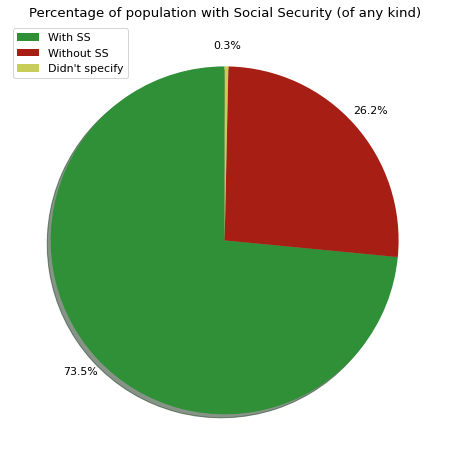

In [ ]:
# We proceed to make a pie chart

plt.figure(figsize=(15,8))

plt.title('Percentage of population with Social Security (of any kind)')
plt.rcParams['font.size'] = 11 # Original: 10
plt.pie(list(SS.values), autopct='%1.1f%%', pctdistance=1.12,
        shadow=True, startangle=90, colors=[(47/255,144/255,55/255), (167/255,30/255,20/255), (200/255,205/255,89/255)],
        explode=[0,0,0])
plt.legend(loc='best', labels=['With SS', 'Without SS', "Didn't specify"], fontsize='medium')
plt.show()

#token
http://www3.inegi.org.mx//sistemas/api/indicadores/v1/tokenVerify.aspx

https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/1002000001,1002000003/es/0700/true/BISE/2.0/[Aquí va tu Token]?type=json